<a href="https://colab.research.google.com/github/JamileSantos/Modelos_Ciencia_de_Dados/blob/master/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Library to k-means
# Author: Jamile S. Santos
# Created: 2020-02-10

#O K-means é um algoritmo do tipo não supervisionado, ou seja, que não trabalha com dados 
#rotulados. O objetivo desse algoritmo é encontrar similaridades entre os dados e agrupá-los 
#conforme o número de cluster passado pelo argumento k.

import math
import random
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

#   1. sepal length in cm
#   2. sepal width in cm
#   3. petal length in cm
#   4. petal width in cm
#   5. class: 
#      0.0 - Iris Setosa
#      1.0 - Iris Versicolour
#      2.0 - Iris Virginica

# |---sepal---|   |---petal--|
# length  width   length width   class
Setosa = (
[[5.1,    3.5,    1.4,    0.2,    0.0],
[ 4.9,    3.0,    1.4,    0.2,    0.0],
[ 4.7,    3.2,    1.3,    0.2,    0.0],
[ 4.6,    3.1,    1.5,    0.2,    0.0],
[ 5.0,    3.6,    1.4,    0.2,    0.0],
[ 5.4,    3.9,    1.7,    0.4,    0.0],
[ 4.6,    3.4,    1.4,    0.3,    0.0],
[ 5.0,    3.4,    1.5,    0.2,    0.0],
[ 4.4,    2.9,    1.4,    0.2,    0.0],
[ 4.9,    3.1,    1.5,    0.1,    0.0],
[ 5.4,    3.7,    1.5,    0.2,    0.0],
[ 4.8,    3.4,    1.6,    0.2,    0.0],
[ 4.8,    3.0,    1.4,    0.1,    0.0],
[ 4.3,    3.0,    1.1,    0.1,    0.0],
[ 5.8,    4.0,    1.2,    0.2,    0.0],
[ 5.7,    4.4,    1.5,    0.4,    0.0],
[ 5.4,    3.9,    1.3,    0.4,    0.0],
[ 5.1,    3.5,    1.4,    0.3,    0.0],
[ 5.7,    3.8,    1.7,    0.3,    0.0],
[ 5.1,    3.8,    1.5,    0.3,    0.0],
[ 5.4,    3.4,    1.7,    0.2,    0.0],
[ 5.1,    3.7,    1.5,    0.4,    0.0],
[ 4.6,    3.6,    1.0,    0.2,    0.0],
[ 5.1,    3.3,    1.7,    0.5,    0.0],
[ 4.8,    3.4,    1.9,    0.2,    0.0],
[ 5.0,    3.0,    1.6,    0.2,    0.0],
[ 5.0,    3.4,    1.6,    0.4,    0.0],
[ 5.2,    3.5,    1.5,    0.2,    0.0],
[ 5.2,    3.4,    1.4,    0.2,    0.0],
[ 4.7,    3.2,    1.6,    0.2,    0.0],
[ 4.8,    3.1,    1.6,    0.2,    0.0],
[ 5.4,    3.4,    1.5,    0.4,    0.0],
[ 5.2,    4.1,    1.5,    0.1,    0.0],
[ 5.5,    4.2,    1.4,    0.2,    0.0],
[ 4.9,    3.1,    1.5,    0.1,    0.0],
[ 5.0,    3.2,    1.2,    0.2,    0.0],
[ 5.5,    3.5,    1.3,    0.2,    0.0],
[ 4.9,    3.1,    1.5,    0.1,    0.0],
[ 4.4,    3.0,    1.3,    0.2,    0.0],
[ 5.1,    3.4,    1.5,    0.2,    0.0],
[ 5.0,    3.5,    1.3,    0.3,    0.0],
[ 4.5,    2.3,    1.3,    0.3,    0.0],
[ 4.4,    3.2,    1.3,    0.2,    0.0],
[ 5.0,    3.5,    1.6,    0.6,    0.0],
[ 5.1,    3.8,    1.9,    0.4,    0.0],
[ 4.8,    3.0,    1.4,    0.3,    0.0],
[ 5.1,    3.8,    1.6,    0.2,    0.0],
[ 4.6,    3.2,    1.4,    0.2,    0.0],
[ 5.3,    3.7,    1.5,    0.2,    0.0],
[ 5.0,    3.3,    1.4,    0.2,    0.0]])

# |---sepal---|   |---petal--|
# length  width   length width   class
Versicolour = (
[[7.0,    3.2,    4.7,    1.4,    1.0],
[ 6.4,    3.2,    4.5,    1.5,    1.0],
[ 6.9,    3.1,    4.9,    1.5,    1.0],
[ 5.5,    2.3,    4.0,    1.3,    1.0],
[ 6.5,    2.8,    4.6,    1.5,    1.0],
[ 5.7,    2.8,    4.5,    1.3,    1.0],
[ 6.3,    3.3,    4.7,    1.6,    1.0],
[ 4.9,    2.4,    3.3,    1.0,    1.0],
[ 6.6,    2.9,    4.6,    1.3,    1.0],
[ 5.2,    2.7,    3.9,    1.4,    1.0],
[ 5.0,    2.0,    3.5,    1.0,    1.0],
[ 5.9,    3.0,    4.2,    1.5,    1.0],
[ 6.0,    2.2,    4.0,    1.0,    1.0],
[ 6.1,    2.9,    4.7,    1.4,    1.0],
[ 5.6,    2.9,    3.6,    1.3,    1.0],
[ 6.7,    3.1,    4.4,    1.4,    1.0],
[ 5.6,    3.0,    4.5,    1.5,    1.0],
[ 5.8,    2.7,    4.1,    1.0,    1.0],
[ 6.2,    2.2,    4.5,    1.5,    1.0],
[ 5.6,    2.5,    3.9,    1.1,    1.0],
[ 5.9,    3.2,    4.8,    1.8,    1.0],
[ 6.1,    2.8,    4.0,    1.3,    1.0],
[ 6.3,    2.5,    4.9,    1.5,    1.0],
[ 6.1,    2.8,    4.7,    1.2,    1.0],
[ 6.4,    2.9,    4.3,    1.3,    1.0],
[ 6.6,    3.0,    4.4,    1.4,    1.0],
[ 6.8,    2.8,    4.8,    1.4,    1.0],
[ 6.7,    3.0,    5.0,    1.7,    1.0],
[ 6.0,    2.9,    4.5,    1.5,    1.0],
[ 5.7,    2.6,    3.5,    1.0,    1.0],
[ 5.5,    2.4,    3.8,    1.1,    1.0],
[ 5.5,    2.4,    3.7,    1.0,    1.0],
[ 5.8,    2.7,    3.9,    1.2,    1.0],
[ 6.0,    2.7,    5.1,    1.6,    1.0],
[ 5.4,    3.0,    4.5,    1.5,    1.0],
[ 6.0,    3.4,    4.5,    1.6,    1.0],
[ 6.7,    3.1,    4.7,    1.5,    1.0],
[ 6.3,    2.3,    4.4,    1.3,    1.0],
[ 5.6,    3.0,    4.1,    1.3,    1.0],
[ 5.5,    2.5,    4.0,    1.3,    1.0],
[ 5.5,    2.6,    4.4,    1.2,    1.0],
[ 6.1,    3.0,    4.6,    1.4,    1.0],
[ 5.8,    2.6,    4.0,    1.2,    1.0],
[ 5.0,    2.3,    3.3,    1.0,    1.0],
[ 5.6,    2.7,    4.2,    1.3,    1.0],
[ 5.7,    3.0,    4.2,    1.2,    1.0],
[ 5.7,    2.9,    4.2,    1.3,    1.0],
[ 6.2,    2.9,    4.3,    1.3,    1.0],
[ 5.1,    2.5,    3.0,    1.1,    1.0],
[ 5.7,    2.8,    4.1,    1.3,    1.0]])

# |---sepal---|   |---petal--|
# length  width   length width   class
Virginica = (
[[6.3,    3.3,    6.0,    2.5,    2.0],
[ 5.8,    2.7,    5.1,    1.9,    2.0],
[ 7.1,    3.0,    5.9,    2.1,    2.0],
[ 6.3,    2.9,    5.6,    1.8,    2.0],
[ 6.5,    3.0,    5.8,    2.2,    2.0],
[ 7.6,    3.0,    6.6,    2.1,    2.0],
[ 4.9,    2.5,    4.5,    1.7,    2.0],
[ 7.3,    2.9,    6.3,    1.8,    2.0],
[ 6.7,    2.5,    5.8,    1.8,    2.0],
[ 7.2,    3.6,    6.1,    2.5,    2.0],
[ 6.5,    3.2,    5.1,    2.0,    2.0],
[ 6.4,    2.7,    5.3,    1.9,    2.0],
[ 6.8,    3.0,    5.5,    2.1,    2.0],
[ 5.7,    2.5,    5.0,    2.0,    2.0],
[ 5.8,    2.8,    5.1,    2.4,    2.0],
[ 6.4,    3.2,    5.3,    2.3,    2.0],
[ 6.5,    3.0,    5.5,    1.8,    2.0],
[ 7.7,    3.8,    6.7,    2.2,    2.0],
[ 7.7,    2.6,    6.9,    2.3,    2.0],
[ 6.0,    2.2,    5.0,    1.5,    2.0],
[ 6.9,    3.2,    5.7,    2.3,    2.0],
[ 5.6,    2.8,    4.9,    2.0,    2.0],
[ 7.7,    2.8,    6.7,    2.0,    2.0],
[ 6.3,    2.7,    4.9,    1.8,    2.0],
[ 6.7,    3.3,    5.7,    2.1,    2.0],
[ 7.2,    3.2,    6.0,    1.8,    2.0],
[ 6.2,    2.8,    4.8,    1.8,    2.0],
[ 6.1,    3.0,    4.9,    1.8,    2.0],
[ 6.4,    2.8,    5.6,    2.1,    2.0],
[ 7.2,    3.0,    5.8,    1.6,    2.0],
[ 7.4,    2.8,    6.1,    1.9,    2.0],
[ 7.9,    3.8,    6.4,    2.0,    2.0],
[ 6.4,    2.8,    5.6,    2.2,    2.0],
[ 6.3,    2.8,    5.1,    1.5,    2.0],
[ 6.1,    2.6,    5.6,    1.4,    2.0],
[ 7.7,    3.0,    6.1,    2.3,    2.0],
[ 6.3,    3.4,    5.6,    2.4,    2.0],
[ 6.4,    3.1,    5.5,    1.8,    2.0],
[ 6.0,    3.0,    4.8,    1.8,    2.0],
[ 6.9,    3.1,    5.4,    2.1,    2.0],
[ 6.7,    3.1,    5.6,    2.4,    2.0],
[ 6.9,    3.1,    5.1,    2.3,    2.0],
[ 5.8,    2.7,    5.1,    1.9,    2.0],
[ 6.8,    3.2,    5.9,    2.3,    2.0],
[ 6.7,    3.3,    5.7,    2.5,    2.0],
[ 6.7,    3.0,    5.2,    2.3,    2.0],
[ 6.3,    2.5,    5.0,    1.9,    2.0],
[ 6.5,    3.0,    5.2,    2.0,    2.0],
[ 6.2,    3.4,    5.4,    2.3,    2.0],
[ 5.9,    3.0,    5.1,    1.8,    2.0]])



In [0]:
# Separando os arrays em apenas duas dimensões (colunas)
Set = np.array(Setosa)
S = Set[:,2:4]

Virg = np.array(Virginica)
Vi = Virg[:,2:4]

Vers = np.array(Versicolour)
Ve = Vers[:,2:4]

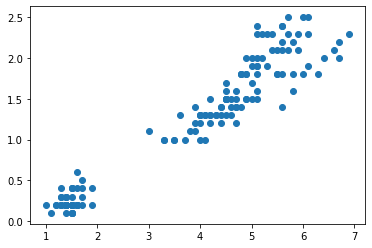

In [3]:
ABC = np.concatenate((S,Vi,Ve))
ABC.shape
plt.scatter(ABC[:,0],ABC[:,1])
plt.show()

In [0]:
def colorir(AB, k, medias):
    K = np.zeros(len(AB))
    
    for i in range(len(AB)):
        menor = float('inf')
        for j in range(k):
            dist = np.sqrt(np.sum( (AB[i] - medias[j])**2 ))
            #print(i,j, dist,AB[i], medias[j])
            if dist < menor:
                K[i] = j + 1
                menor = dist
            
    if(AB.shape[1] ==2):
        cols=[]
        for l in K:
            if l==1:
                cols.append('red')
            elif l==2:
                cols.append('blue')
            elif l==3:
                cols.append('yellow')
            elif l==4:
                cols.append('pink')
            else:
                cols.append('black')

        plt.scatter(AB[:,0],AB[:,1], c = cols)
        plt.title("Atribuindo cores")
        plt.scatter(medias[:,0], medias[:,1], c='black', s=500, marker='+')
        plt.show()
        
    return K

def calculo_media(AB, K, k):
    new_mean_lst = []
    
    for i in range(k):
        new_mean_lst.append([])
    
    for i in range(len(AB)):
        new_mean_lst[int(K[i])-1].append(AB[i])

    new_mean_lst2 = []
    #for i in range(k):
    #    new_mean_lst2.append([])
    for i in range(k):
        #print(np.mean(np.array(new_mean_lst[i]),0))
        new_mean_lst2.append(np.mean(np.array(new_mean_lst[i]),0))
    #print(new_mean_lst2)
    new_mean = np.array(new_mean_lst2)
    
    if(AB.shape[1] ==2):
        cols=[]
        for l in K:
            if l==1:
                cols.append('red')
            elif l==2:
                cols.append('blue')
            elif l==3:
                cols.append('yellow')
            elif l==4:
                cols.append('pink')
            else:
                cols.append('black')

        plt.scatter(AB[:,0],AB[:,1], c = cols)
        plt.scatter(new_mean[:,0], new_mean[:,1],c='black', s=500, marker='+')
        plt.title("Cálculo da média")
        plt.show()
    
    return np.array(new_mean_lst2)



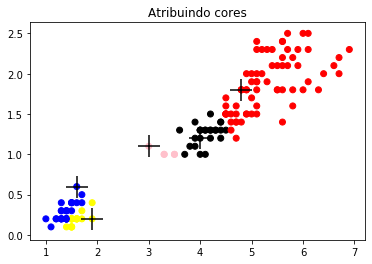

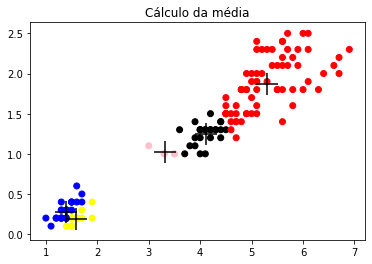

In [5]:
k=5

md = []
for i in range(k):
    md.append( ABC[random.randint(0, len(ABC))] )

media = np.array(md)

K = colorir(ABC,k,media)
media = calculo_media(ABC, K, k)

In [7]:
acc = 0
for i in range(len(ABC)//2):
    if K[i] == 1:
        acc += 1;  
for i in range(len(ABC)//2):
    if K[i] == 2:
        acc += 1;
for i in range(len(ABC)//2, len(ABC)):
    if K[i] == 3:
        acc += 1;
for i in range(len(ABC)//2, len(ABC)):
    if K[i] == 4:
        acc += 1    
print("Acurácia de {:f}%".format(acc*100/len(ABC)))

Acurácia de 40.000000%
